# Анализ датасета Твиттера

## Задача

Проанализировать датасет Твиттера, выяснить зависит ли длина твита на количество лайков и ретвитов, определить распределение количества твитов по длине, посчитать количество твитов за каждый месяц, собрать облако самых частных слов, выявить 5 самых популярных слов. 

Данные взяты с сайта [Kaggle.com](https://kaggle.com/datasets/goyaladi/twitter-dataset/data) и записаны в файл twitter_dataset.csv. Данные включают в себя информацию с 1 января 2023 года по 15 мая 2023.

## Описание данных

- Tweet_ID - индентификатор твита
- Username - имя пользователя
- Text - текст твита
- Retweets - количество ретвитов
- Likes - количество лайков
- Timestamp - дата и время

## Этапы выполнения проекта
1. Получение данных
2. Предобработка данных
3. Анализ данных
4. Результаты анализа

## 1. Получение данных

In [420]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Прочитаем и запишем в переменную df файл twitter_dataset.csv Для индекса будет использовать столбец Tweet_ID.

In [421]:
# чтение и запись в df twitter_dataset.csv
df = pd.read_csv("twitter_dataset.csv", index_col="Tweet_ID")

Первые 5 строк датасета.

In [ ]:
df.head(5)

Общая информация о датасете

In [ ]:
df.info()

Рассмотрим данную информацию. 

Датасет содержит 5 столбцов - 3 типа object и 2 типа int64. 

Количество данных во всем столбцах одинаково и не содержат пропуски - дополнительная обработка не требуется, кроме изменения названия столбцов в нижний регистр.

## 2. Предобработка данных

Изменим названия столбцов в нижний регистр для удобства.

In [ ]:
df.columns

In [ ]:
df = df.rename(columns=lambda x: x.lower())

Проверим результат.

In [ ]:
df.columns

Изменим тип Timestamp на Datetime и выберем его в качестве индекса для будущего удобства группировки по месяцам.

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S') # меняем тип Timestamp
df = df.set_index('timestamp') # выбираем его в качестве индекса для будущей группировки по месяцам

Проверка на дубликаты.

In [ ]:
df.duplicated().sum()

Дубликаты отсутсвуют.

## 3. Анализ данных

Вычислим длину твитов в символах.

In [ ]:
lens_of_tweets = df['text'].str.len() 

Построим график отношения количества лайков к длине твита.

In [ ]:
sns.scatterplot(x=lens_of_tweets, y=df['likes'])
plt.xlabel("Tweet's length")
plt.ylabel("Likes")
plt.title("Likes by tweet's length")

Исходя из графика, влияние длины твита на количество лайков не замечено.

Построим график отношения количества ретвитов к длине твита.

In [ ]:
sns.scatterplot(x=lens_of_tweets, y=df['retweets'])
plt.xlabel("Tweet's length")
plt.ylabel("Retweets")
plt.title("Retweets by tweet's length")

Исходя из графика, влияние длины твита на количество ретвитов также не замечено.

Построим график зависимости количества твитов от длины твита.

In [ ]:
count_tweets_with_len = lens_of_tweets.value_counts()
sns.scatterplot(x = count_tweets_with_len.index, y = count_tweets_with_len.values)
plt.xlabel("Tweet's length")
plt.ylabel("Count of tweets")
plt.title("Count of tweets by tweet's length")

Из графика видно, что с увеличением длины твитов количество твитов также растет, что может указывать на тенденцию к более длинным сообщениям.

Построим гистограмму количества твитов в каждом месяце.

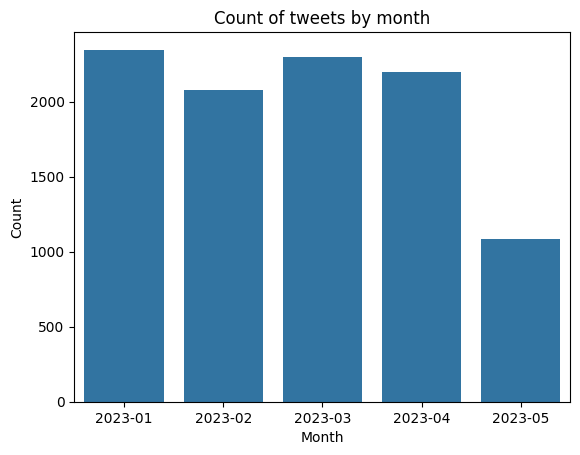

In [416]:
monthly_group = df.groupby(pd.Grouper(freq='ME')) # граппировка по месяцам
month_count = monthly_group.size() # количество
month_count.index = month_count.index.strftime('%Y-%m') # оставить только YYYY-MM
sns.barplot(month_count)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count of tweets by month")

Количество колеблется в пределах около 2000 твитов, но заметен спад в мае из-за неполного периода сбора информации(до 15 мая 2023 года)

Создадим облако самых частых слов.

Text(0.5, 1.0, 'Word cloud of most frequent words')

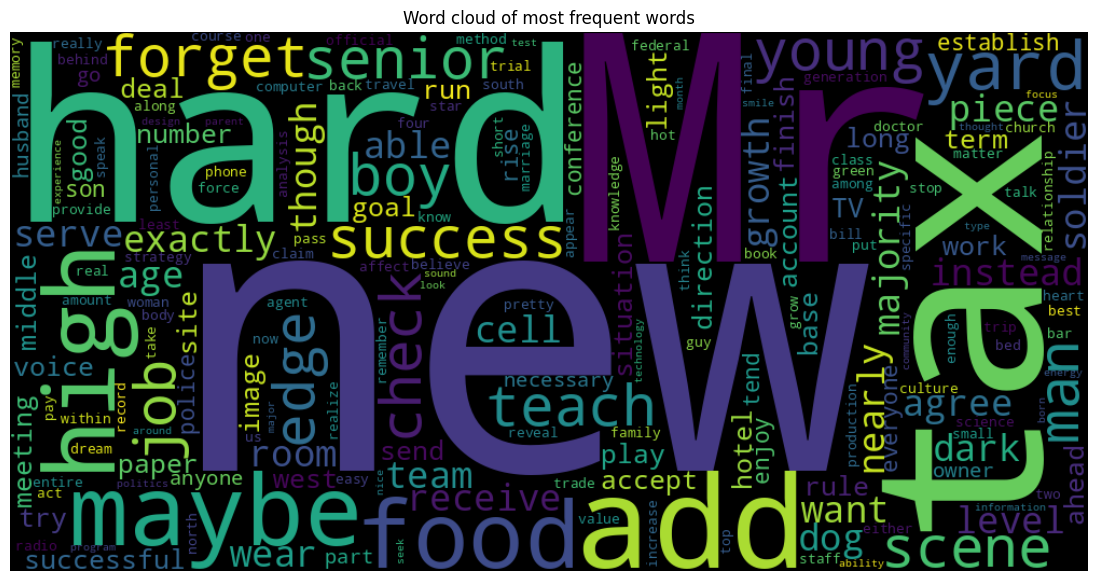

In [387]:
text = ' '.join(df['text'])

wordcloud = WordCloud(width=1000, height=500).generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words')

Найдем 5 самых частых слов в датасете.

Text(0.5, 1.0, 'Most frequent words')

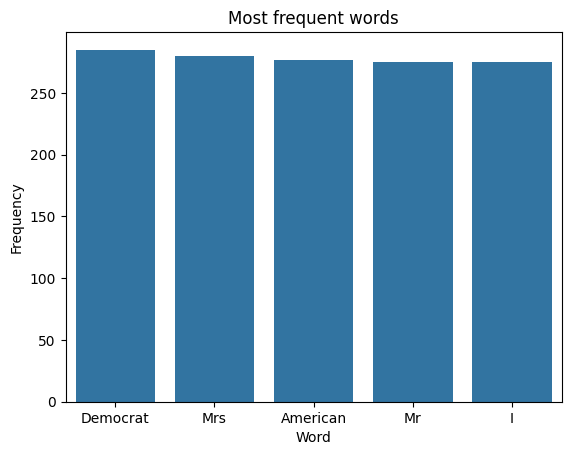

In [419]:
text = ' '.join(df['text'])

words = text.split()

counts_of_words = pd.Series(words).value_counts()
sns.barplot(x=counts_of_words.head().index, y=counts_of_words.head().values)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Most frequent words")

Слова Democrat, Mrs, Amerian, Mr, I встречаются в текстах твитов более 250 раз.

## 4. Результаты анализа

Проанализировав датасет, можно сделать выводы, что:
- длина твита не влияет на количество лайков и ретвитов;
- с увеличением длины твитов количество твитов также растет. Это указывает на положительную корреляцию;
- количество твитов в каждом месяце примерно одинаково, за исключением мая из-за неполного сбора данных(до 15 мая 2023 года);
- 5 самых частых слов - Democrat, Mrs, Amerian, Mr, I встречаются в твитах более 250 раз.